In [32]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math  # Various math expressions
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from IPython.display import display, Math
from sympy import symbols, Eq
from sympy.printing.latex import latex
%matplotlib inline 
plt.style.use('ggplot') # just have in your script for prettier plotting
sns.set(color_codes = True)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
filename = "/kaggle/input/titanic-data/Titanic.xlsx"        
df = pd.read_excel(filename)
df.head()

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic-data/Titanic.xlsx


/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [33]:
df.describe()  # Summary stats cols

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [34]:
lst = df.columns.tolist()  # get column names as a list
print(lst)

['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest']


In [35]:
df.dropna() # DataFrame after removing NaN rows
df['age'].unique()  # Dataframe check for unique values in column

array([29.    ,  0.9167,  2.    , 30.    , 25.    , 48.    , 63.    ,
       39.    , 53.    , 71.    , 47.    , 18.    , 24.    , 26.    ,
       80.    ,     nan, 50.    , 32.    , 36.    , 37.    , 42.    ,
       19.    , 35.    , 28.    , 45.    , 40.    , 58.    , 22.    ,
       41.    , 44.    , 59.    , 60.    , 33.    , 17.    , 11.    ,
       14.    , 49.    , 76.    , 46.    , 27.    , 64.    , 55.    ,
       70.    , 38.    , 51.    , 31.    ,  4.    , 54.    , 23.    ,
       43.    , 52.    , 16.    , 32.5   , 21.    , 15.    , 65.    ,
       28.5   , 45.5   , 56.    , 13.    , 61.    , 34.    ,  6.    ,
       57.    , 62.    , 67.    ,  1.    , 12.    , 20.    ,  0.8333,
        8.    ,  0.6667,  7.    ,  3.    , 36.5   , 18.5   ,  5.    ,
       66.    ,  9.    ,  0.75  , 70.5   , 22.5   ,  0.3333,  0.1667,
       40.5   , 10.    , 23.5   , 34.5   , 20.5   , 30.5   , 55.5   ,
       38.5   , 14.5   , 24.5   , 60.5   , 74.    ,  0.4167, 11.5   ,
       26.5   ])

In [36]:
new_df = df[~df['age'].astype(str).str.strip().isin(['', 'nan', 'NaN', 'NAN', '    nan'])]  # DataFrame after removing NaN rows
#new_df = df[~df['fare'].astype(str).str.strip().isin(['', 'nan', 'NaN', 'NAN', '    nan'])]  # DataFrame after removing NaN rows
new_df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1046.000000,1046.000000,1046.000000,1046.000000,1046.00000,1045.000000,120.00000
mean,2.207457,0.408222,29.881135,0.502868,0.42065,36.686080,160.87500
std,0.841497,0.491740,14.413500,0.912167,0.83975,55.732533,98.10392
min,1.000000,0.000000,0.166700,0.000000,0.00000,0.000000,1.00000
25%,1.000000,0.000000,21.000000,0.000000,0.00000,8.050000,71.50000
50%,2.000000,0.000000,28.000000,0.000000,0.00000,15.750000,155.50000
75%,3.000000,1.000000,39.000000,1.000000,1.00000,35.500000,256.50000
max,3.000000,1.000000,80.000000,8.000000,6.00000,512.329200,328.00000


In [37]:
# Key for the DataFrame column meanings
print('\nKey for the DataFrame column meanings:\n')
print('survived ---> Whether Survived or not: 0 = No; 1 = Yes\n')
print('pclass ---> Passenger Class: 1 = 1st; 2 = 2nd; 3 = 3rd\n')
print('name ---> Name of passenger\n')
print('sex ---> Passenger gender\n')
print('age ---> Passenger Age in years\n')
print('sibSp ---> # of siblings/spouses aboard the Titanic\n')
print('parch ---> # of parents/children aboard the Titanic\n')
print('ticket ---> Ticket number\n')
print('fare ---> Passenger Fare\n')
print('embarked ---> Port of embarkation (C = Cherboug, Q = Queenstown, S = Southampton\n')
print('cabin ---> Passenger cabin number\n')
print('body ---> Passenger Body weight\n')
print('boat ---> Passenger rescue boat number\n')
print('home.dest ---> Passenger home address\n')



Key for the DataFrame column meanings:

survived ---> Whether Survived or not: 0 = No; 1 = Yes

pclass ---> Passenger Class: 1 = 1st; 2 = 2nd; 3 = 3rd

name ---> Name of passenger

sex ---> Passenger gender

age ---> Passenger Age in years

sibSp ---> # of siblings/spouses aboard the Titanic

parch ---> # of parents/children aboard the Titanic

ticket ---> Ticket number

fare ---> Passenger Fare

embarked ---> Port of embarkation (C = Cherboug, Q = Queenstown, S = Southampton

cabin ---> Passenger cabin number

body ---> Passenger Body weight

boat ---> Passenger rescue boat number

home.dest ---> Passenger home address



In [38]:
new_df['fare'].unique()

array([211.3375, 151.55  ,  26.55  ,  77.9583,   0.    ,  51.4792,
        49.5042, 227.525 ,  69.3   ,  78.85  ,  30.    , 247.5208,
        76.2917,  75.2417,  52.5542, 221.7792,  26.    ,  91.0792,
       135.6333,  35.5   ,  31.    , 164.8667, 262.375 ,  55.    ,
        30.5   ,  50.4958,  27.7208, 134.5   ,  26.2875,  27.4458,
       512.3292,   5.    ,  47.1   , 120.    ,  61.175 ,  53.1   ,
        86.5   ,  29.7   , 136.7792,  25.5875,  83.1583,  25.7   ,
        71.    ,  71.2833,  52.    ,  57.    ,  81.8583, 106.425 ,
        39.6   ,  56.9292,  78.2667,  31.6792,  26.3875,  27.75  ,
       263.    , 133.65  ,  49.5   ,  79.2   ,  38.5   , 211.5   ,
        59.4   ,  89.1042,  34.6542,  28.5   , 153.4625,  63.3583,
        55.4417,  76.7292,  83.475 ,  93.5   ,  42.5   ,  50.    ,
        57.9792,  90.    ,  80.    ,  28.7125,  51.8625,  25.9292,
        39.4   ,  45.5   , 146.5208,  82.1708,  57.75  ,  42.4   ,
       113.275 ,  26.2833, 108.9   ,  61.9792,  66.6   ,  40.1

In [39]:
new_df = new_df[~new_df['fare'].astype(str).str.strip().isin(['', 'nan', 'NaN', 'NAN', '    nan'])]
new_df = new_df[~new_df['embarked'].astype(str).str.strip().isin(['', 'nan', 'NaN', 'NAN', '    nan'])]
new_df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,119.000000
mean,2.209012,0.407478,29.813199,0.504314,0.421860,36.603024,160.033613
std,0.840685,0.491601,14.366261,0.913080,0.840655,55.753648,98.082975
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,21.000000,0.000000,0.000000,8.050000,71.000000
50%,2.000000,0.000000,28.000000,0.000000,0.000000,15.750000,155.000000
75%,3.000000,1.000000,39.000000,1.000000,1.000000,35.077100,255.500000
max,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,328.000000


In [40]:
new_df = new_df.drop(['cabin','body','boat', 'home.dest'], axis = 1)

In [41]:
srv_df = new_df[new_df['survived'] == 1]
srv_df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,S
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,S
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,S


In [42]:
dd_df = new_df[new_df['survived'] == 0]
dd_df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
2,1,0,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.5500,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0,1,2,113781,151.5500,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,S
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0000,S
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,C


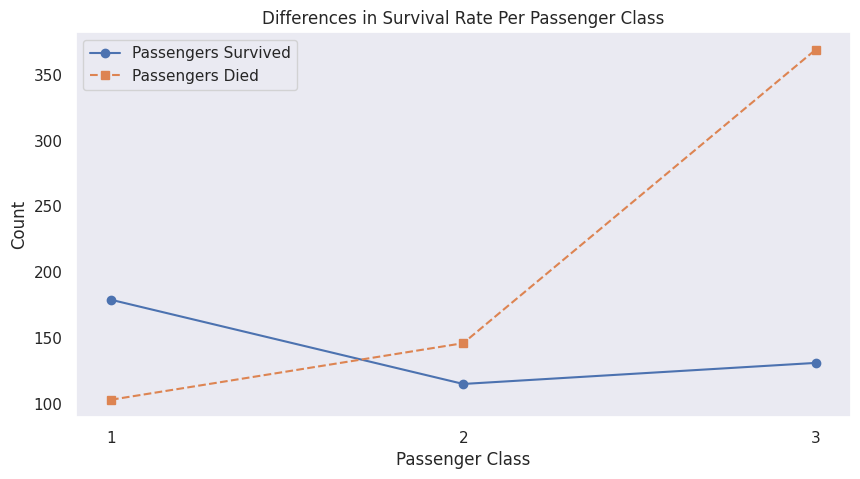

In [43]:
srv_counts = srv_df['pclass'].value_counts().sort_index()
dd_counts = dd_df['pclass'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
plt.plot(srv_counts.index, srv_counts.values, marker='o', linestyle='-', label='Passengers Survived')
plt.plot(dd_counts.index, dd_counts.values, marker='s', linestyle='--', label='Passengers Died')

plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.title(f'Differences in Survival Rate Per Passenger Class')
plt.legend()
plt.grid()

# Ensure x-axis uses whole numbers
plt.xticks(np.arange(min(srv_counts.index.min(), dd_counts.index.min()), 
                     max(srv_counts.index.max(), dd_counts.index.max()) + 1, 1))
plt.show()
# plt.savefig('MortalityDifferencesperclass.png')

<ipython-input-44-e6bb7d6344c6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  srv_df['sex'] = srv_df['sex'].str.capitalize()  # Capitalising first letter of the gender
<ipython-input-44-e6bb7d6344c6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dd_df['sex'] = dd_df['sex'].str.capitalize()


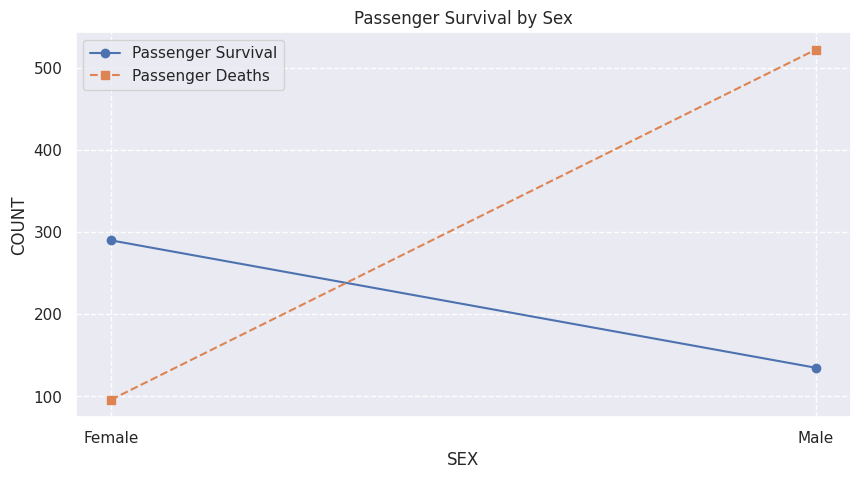

In [44]:
srv_df['sex'] = srv_df['sex'].str.capitalize()  # Capitalising first letter of the gender
dd_df['sex'] = dd_df['sex'].str.capitalize()

srv_counts_g = srv_df['sex'].value_counts().sort_index()
dd_counts_g = dd_df['sex'].value_counts().sort_index()

plt.figure(figsize = (10, 5))
plt.plot(srv_counts_g.index, srv_counts_g.values, marker='o', linestyle='-', label='Passenger Survival')
plt.plot(dd_counts_g.index, dd_counts_g.values, marker='s', linestyle='--', label='Passenger Deaths')

plt.xlabel('SEX')
plt.ylabel('COUNT')
plt.title(f'Passenger Survival by Sex')
plt.legend()
plt.grid(True, linestyle='--', alpha = 0.97)
plt.show()
# plt.savefig("PassengerSurvivalbySex.png")

In [45]:
dd_df_M = dd_df[dd_df['sex'] == 'Male']
dd_df_F = dd_df[dd_df['sex'] == 'Female']
srv_df_M = srv_df[srv_df['sex'] == 'Male']
srv_df_F = srv_df[srv_df['sex'] == 'Female']

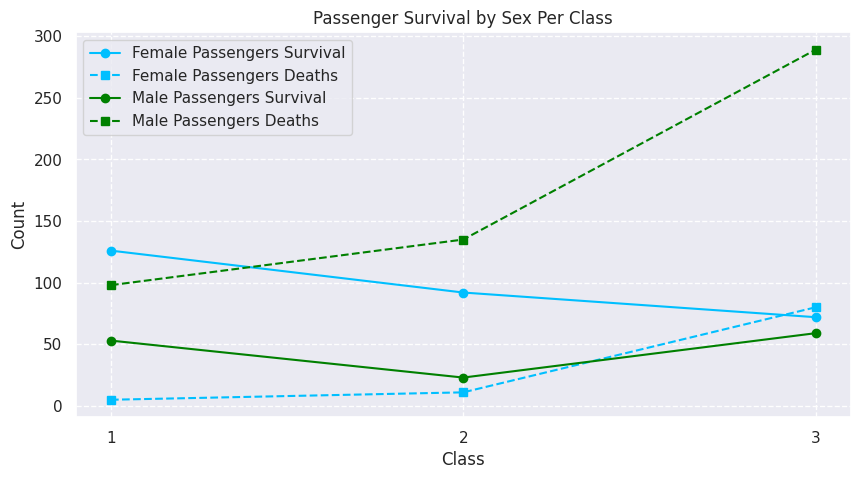

In [46]:
srv_counts_f = srv_df_F['pclass'].value_counts().sort_index()
srv_counts_m = srv_df_M['pclass'].value_counts().sort_index()
dd_counts_f = dd_df_F['pclass'].value_counts().sort_index()
dd_counts_m = dd_df_M['pclass'].value_counts().sort_index()

plt.figure(figsize = (10, 5))
plt.plot(srv_counts_f.index, srv_counts_f.values, marker='o', linestyle='-', color = 'deepskyblue', label='Female Passengers Survival')
plt.plot(dd_counts_f.index, dd_counts_f.values, marker='s', linestyle='--', color = 'deepskyblue', label='Female Passengers Deaths')
plt.plot(srv_counts_m.index, srv_counts_m.values, marker = 'o', linestyle = '-', color = 'green', label = 'Male Passengers Survival')
plt.plot(dd_counts_m.index, dd_counts_m.values, marker = 's', linestyle = '--', color = 'green', label = 'Male Passengers Deaths')

plt.xlabel('Class')
plt.ylabel('Count')
plt.title(f'Passenger Survival by Sex Per Class')
plt.legend()
plt.grid(True, linestyle='--', alpha = 0.97)
# Ensure x-axis uses whole numbers
plt.xticks(np.arange(min(srv_counts_f.index.min(), srv_counts_m.index.min(), dd_counts_f.index.min(), dd_counts_m.index.min()), 
                         max(srv_counts_f.index.max(), srv_counts_m.index.max(), dd_counts_f.index.max(), dd_counts_m.index.max()) + 1, 1))

plt.show()
# plt.savefig("PassengerMortalitybySexperClass.png")

In [47]:
print(new_df['age'].std())

14.366260969481111


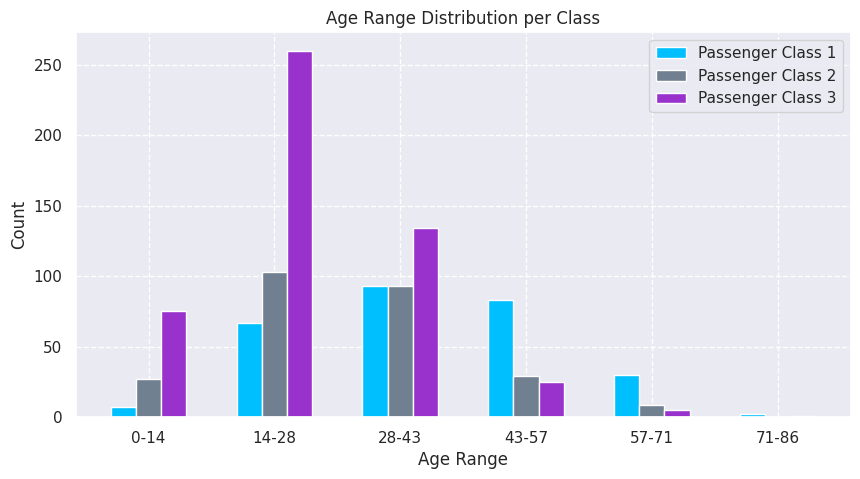

In [48]:
new_df_age = new_df['age'].value_counts().sort_index()
new_df_std = new_df['age'].std()
bins = np.arange(new_df_age.index.min(), new_df_age.index.max() + 7, new_df_std)  # Creating age bins using age standard deviation
labels = [f'{int(bins[i])}-{int(bins[i+1])}' for i in range(len(bins)-1)]
new_df['Age Range'] = pd.cut(new_df['age'], bins = bins, labels = labels, include_lowest = True)

pclass_1 = new_df[new_df['pclass'] == 1]
pclass_2 = new_df[new_df['pclass'] == 2]
pclass_3 = new_df[new_df['pclass'] == 3]

p_counts_1 = pclass_1['Age Range'].value_counts().sort_index()
p_counts_2 = pclass_2['Age Range'].value_counts().sort_index()
p_counts_3 = pclass_3['Age Range'].value_counts().sort_index()

#labels = sorted(set(p_counts_1.index) | set(p_counts_2.index) | set(p_counts_3.index))
width = 0.2  # Bar width for grouping

plt.figure(figsize = (10, 5))
colors = ['deepskyblue', 'slategray', 'darkorchid']  # Assign different colors to each dataframe

for i, (counts, color, label) in enumerate(zip([p_counts_1, p_counts_2, p_counts_3], colors, ['Passenger Class 1', 'Passenger Class 2', 'Passenger Class 3'])):
    values = [counts.get(l, 0) for l in labels]  # Get counts, default to 0 if not present
    plt.bar(np.arange(len(labels)) + i * width, values, width=width, color=color, label=label)

plt.xlabel('Age Range')
plt.ylabel('Count')
plt.title(f'Age Range Distribution per Class')
plt.legend()
plt.grid(True, linestyle='--', alpha = 0.97)
plt.xticks(np.arange(len(labels)) + width, labels, rotation = 0)

plt.show()
# plt.savefig("AgeRangeDistributionperClass.png")

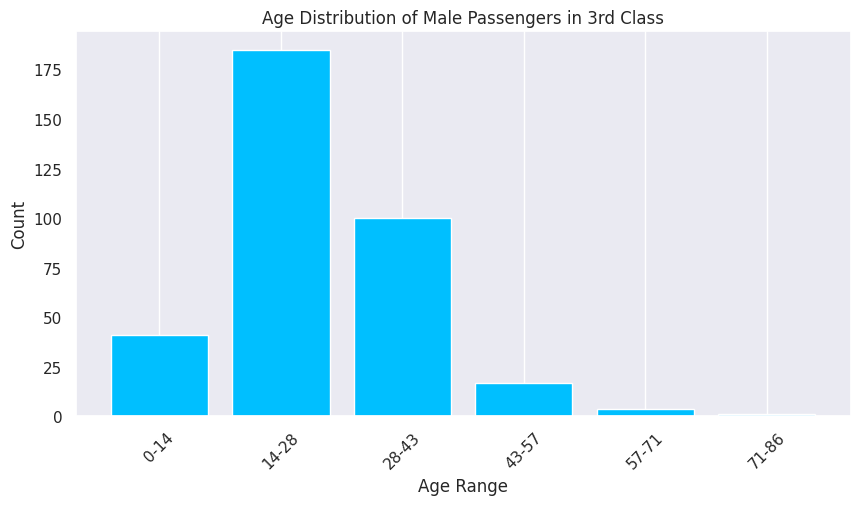

In [49]:
pclass_3_M = pclass_3[pclass_3['sex'] == 'male']

counts = pclass_3_M['Age Range'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
plt.bar(counts.index, counts.values, color='deepskyblue')

plt.xlabel('Age Range')
plt.ylabel('Count')
plt.title('Age Distribution of Male Passengers in 3rd Class')
plt.xticks(rotation = 45)
# plt.xticks(np.arange(len(labels)) + width, labels, rotation = 0)
plt.grid(axis='y')
# plt.grid(True, linestyle='--', alpha = 0.97)

plt.show()
# plt.savefig("MaleAgeDistributionin3rdClass.png")

<ipython-input-50-c267261faaca>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  srv_df['Age Range'] = pd.cut(new_df['age'], bins = bins, labels = labels, include_lowest = True)


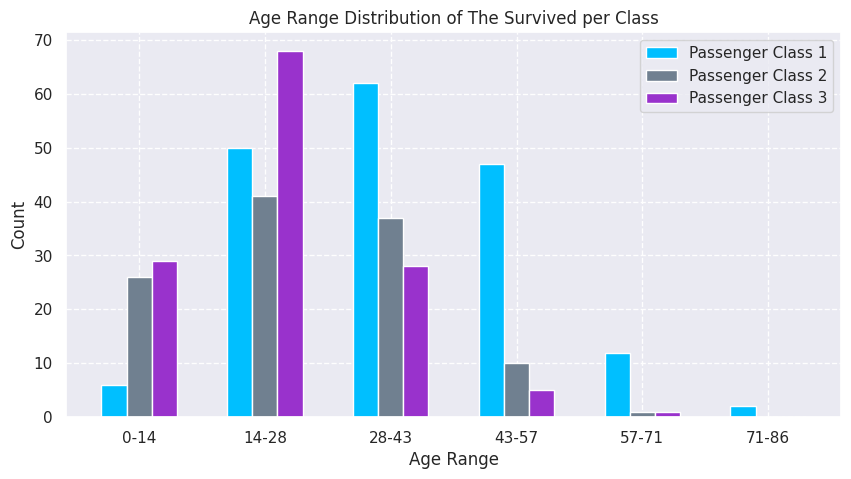

In [50]:
new_df_age = srv_df['age'].value_counts().sort_index()
new_df_std = new_df['age'].std()
bins = np.arange(new_df_age.index.min(), new_df_age.index.max() + 7, new_df_std)  # Creating age bins using age standard deviation
labels = [f'{int(bins[i])}-{int(bins[i+1])}' for i in range(len(bins)-1)]
srv_df['Age Range'] = pd.cut(new_df['age'], bins = bins, labels = labels, include_lowest = True)

pclass_1 = srv_df[srv_df['pclass'] == 1]
pclass_2 = srv_df[srv_df['pclass'] == 2]
pclass_3 = srv_df[srv_df['pclass'] == 3]

p_counts_1 = pclass_1['Age Range'].value_counts().sort_index()
p_counts_2 = pclass_2['Age Range'].value_counts().sort_index()
p_counts_3 = pclass_3['Age Range'].value_counts().sort_index()

#labels = sorted(set(p_counts_1.index) | set(p_counts_2.index) | set(p_counts_3.index))
width = 0.2  # Bar width for grouping

plt.figure(figsize = (10, 5))
colors = ['deepskyblue', 'slategray', 'darkorchid']  # Assign different colors to each dataframe

for i, (counts, color, label) in enumerate(zip([p_counts_1, p_counts_2, p_counts_3], colors, ['Passenger Class 1', 'Passenger Class 2', 'Passenger Class 3'])):
    values = [counts.get(l, 0) for l in labels]  # Get counts, default to 0 if not present
    plt.bar(np.arange(len(labels)) + i * width, values, width=width, color=color, label=label)

plt.xlabel('Age Range')
plt.ylabel('Count')
plt.title(f'Age Range Distribution of The Survived per Class')
plt.legend()
plt.grid(True, linestyle='--', alpha = 0.97)
plt.xticks(np.arange(len(labels)) + width, labels, rotation = 0)

plt.show()
# plt.savefig("SurvivedAgeRangeDistributionperClass.png")

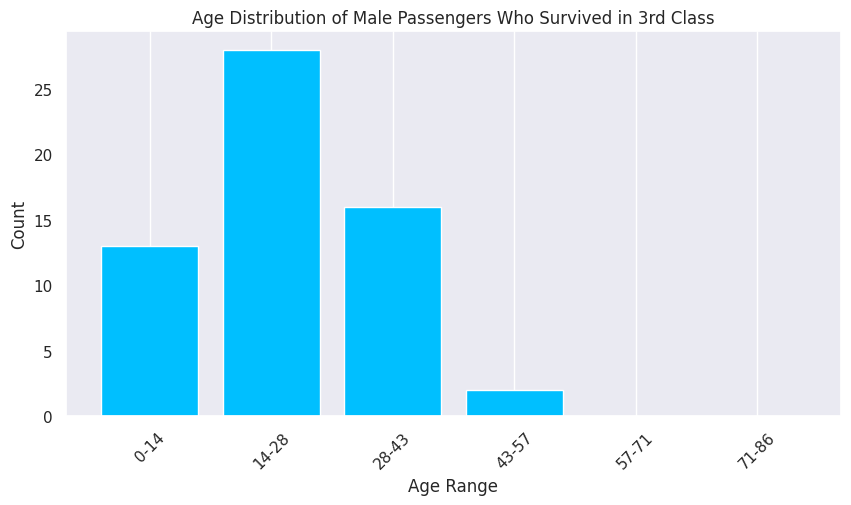

In [51]:
pclass_3_M = pclass_3[pclass_3['sex'] == 'Male']

counts = pclass_3_M['Age Range'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
plt.bar(counts.index, counts.values, color='deepskyblue')

plt.xlabel('Age Range')
plt.ylabel('Count')
plt.title('Age Distribution of Male Passengers Who Survived in 3rd Class')
plt.xticks(rotation = 45)
# plt.xticks(np.arange(len(labels)) + width, labels, rotation = 0)
plt.grid(axis='y')
# plt.grid(True, linestyle='--', alpha = 0.97)

plt.show()
# plt.savefig("SurvivedMaleAgeDistributionin3rdClass.png")

<ipython-input-52-b3a13e3ec036>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  srv_child_df.drop('sex', axis = 1, inplace = True)
<ipython-input-52-b3a13e3ec036>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  srv_child_df['sex'] = 'Child'
<ipython-input-52-b3a13e3ec036>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dd_child_df.drop('sex', axis = 1, inplace = True)
<ipytho

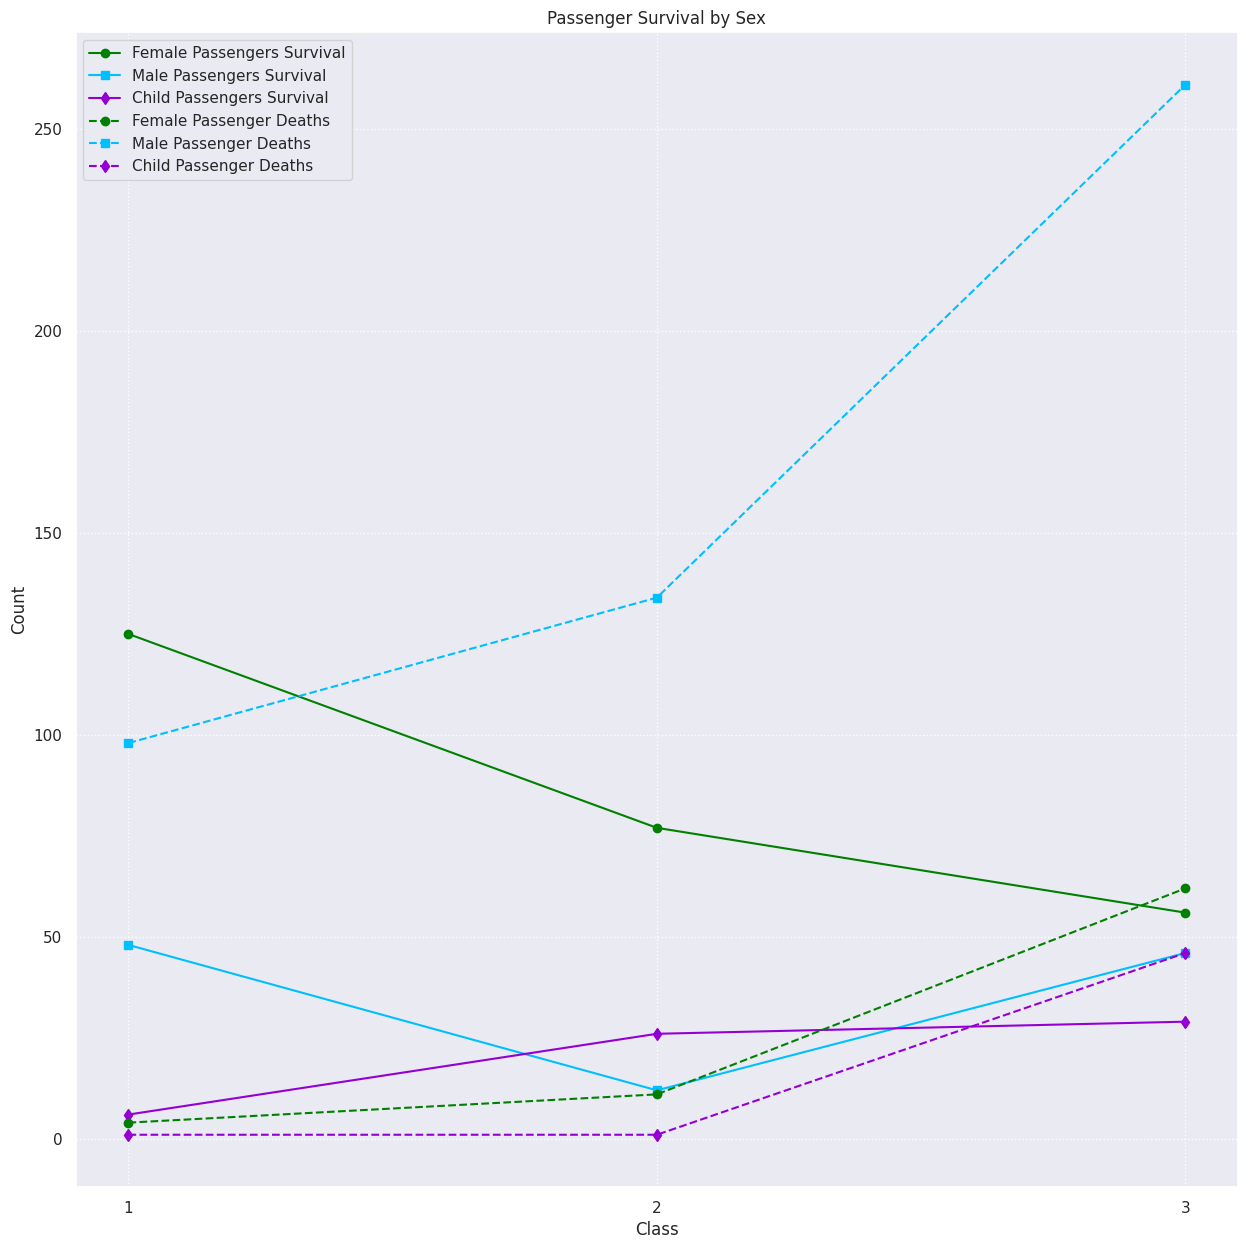

In [52]:
# Passenger Survival
srv_child_df = srv_df[srv_df['age'] < 15]
srv_child_df.drop('sex', axis = 1, inplace = True)
srv_child_df['sex'] = 'Child'
srv_extra_df = srv_df[srv_df['age'] >= 15]

#srv_extra_df['sex'] = srv_extra_df['sex'].str.capitalize()
srv_F_df = srv_extra_df[srv_extra_df['sex'] == 'Female']
srv_M_df = srv_extra_df[srv_extra_df['sex'] == 'Male']

srv_F_counts = srv_F_df['pclass'].value_counts().sort_index()
srv_M_counts = srv_M_df['pclass'].value_counts().sort_index()
srv_C_counts = srv_child_df['pclass'].value_counts().sort_index()


# Passenger Deaths
dd_child_df = dd_df[dd_df['age'] < 15]
dd_child_df.drop('sex', axis = 1, inplace = True)
dd_child_df['sex'] = 'Child'
dd_extra_df = dd_df[dd_df['age'] >= 15]

#dd_extra_df['sex'] = dd_extra_df['sex'].str.capitalize()
dd_F_df = dd_extra_df[dd_extra_df['sex'] == 'Female']
dd_M_df = dd_extra_df[dd_extra_df['sex'] == 'Male']

dd_F_counts = dd_F_df['pclass'].value_counts().sort_index()
dd_M_counts = dd_M_df['pclass'].value_counts().sort_index()
dd_C_counts = dd_child_df['pclass'].value_counts().sort_index()


# Plotting the Line Plot to show the distribution in survivals
plt.figure(figsize = (15, 15))

plt.plot(srv_F_counts.index, srv_F_counts.values, marker = 'o', linestyle = '-', color = 'green', label = 'Female Passengers Survival')
plt.plot(srv_M_counts.index, srv_M_counts.values, marker = 's', linestyle = '-', color = 'deepskyblue', label = 'Male Passengers Survival')
plt.plot(srv_C_counts.index, srv_C_counts.values, marker = 'd', linestyle = '-', color = 'darkviolet', label = 'Child Passengers Survival')

plt.plot(dd_F_counts.index, dd_F_counts.values, marker = 'o', linestyle = '--', color = 'green', label = 'Female Passenger Deaths')
plt.plot(dd_M_counts.index, dd_M_counts.values, marker = 's', linestyle = '--', color = 'deepskyblue', label = 'Male Passenger Deaths')
plt.plot(dd_C_counts.index, dd_C_counts.values, marker = 'd', linestyle = '--', color = 'darkviolet', label = 'Child Passenger Deaths')

plt.xlabel('Class')
plt.ylabel('Count')
plt.title(f'Passenger Survival by Sex')
plt.legend()
plt.grid(True, linestyle = 'dotted', alpha = 0.97)
plt.xticks(np.arange(min(srv_F_counts.index.min(), srv_M_counts.index.min(), srv_C_counts.index.min(), dd_F_counts.index.min(), dd_C_counts.index.min(), dd_M_counts.index.min()), 
                         max(srv_F_counts.index.max(), srv_M_counts.index.max(),srv_C_counts.index.max(), dd_F_counts.index.max(), dd_C_counts.index.max(), dd_M_counts.index.max()) + 1, 1))

plt.show()
# plt.savefig("PassangerMortalitybySexperClass.png")

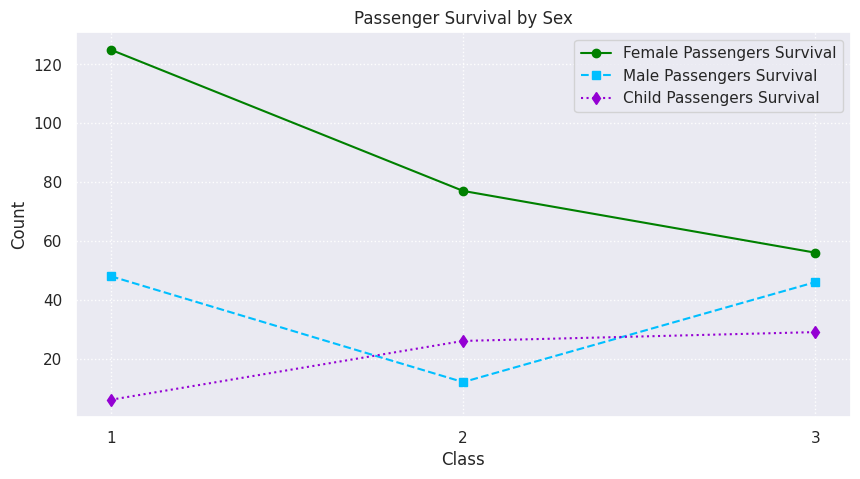

In [53]:
# Plotting the Line Plot to show the distribution in survivals
plt.figure(figsize = (10, 5))

plt.plot(srv_F_counts.index, srv_F_counts.values, marker = 'o', linestyle = '-', color = 'green', label = 'Female Passengers Survival')
plt.plot(srv_M_counts.index, srv_M_counts.values, marker = 's', linestyle = '--', color = 'deepskyblue', label = 'Male Passengers Survival')
plt.plot(srv_C_counts.index, srv_C_counts.values, marker = 'd', linestyle = 'dotted', color = 'darkviolet', label = 'Child Passengers Survival')

plt.xlabel('Class')
plt.ylabel('Count')
plt.title(f'Passenger Survival by Sex')
plt.legend()
plt.grid(True, linestyle = 'dotted', alpha = 0.97)
plt.xticks(np.arange(min(srv_F_counts.index.min(), srv_M_counts.index.min(), srv_C_counts.index.min()), 
                         max(srv_F_counts.index.max(), srv_M_counts.index.max(),srv_C_counts.index.max()) + 1, 1))

plt.show()

In [54]:
def merge_columns_from_dfs(dfs, column_name):  # Function to merge a specific column from multiple dataframes into a single column in a new dataframe.
    merged_df = pd.concat([df[[column_name]] for df in dfs], ignore_index=True)
    return merged_df

sex_df = merge_columns_from_dfs([srv_F_df, srv_M_df, srv_child_df], 'sex')
#sex_df.head()

df_sex = sex_df['sex'].value_counts().sort_index()
#sex_df_std = df_sex.std()
#bins = np.arange(df_sex.index.min(), df_sex.index.max(), sex_df_std)  # Creating age bins using age standard deviation
#labels = [f'{int(bins[i])}-{int(bins[i+1])}' for i in range(len(bins)-1)]

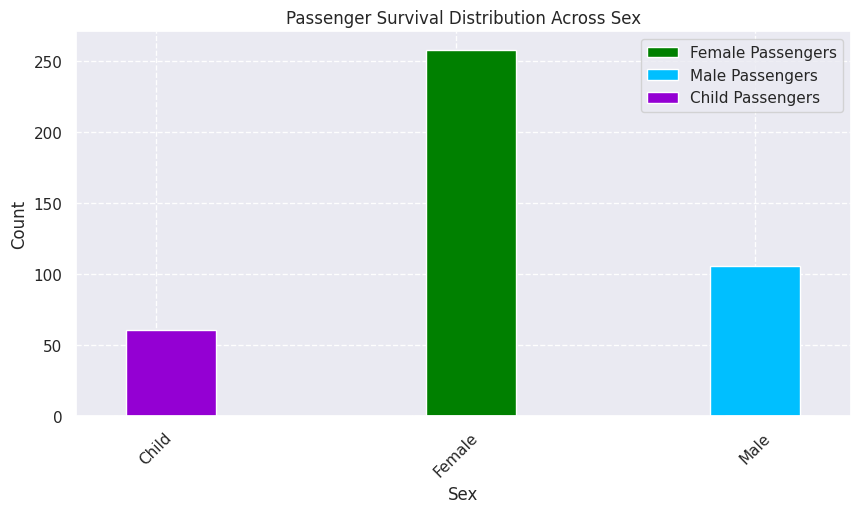

In [55]:
srv_F_counts = srv_F_df['sex'].value_counts().sort_index()
srv_M_counts = srv_M_df['sex'].value_counts().sort_index()
srv_C_counts = srv_child_df['sex'].value_counts().sort_index()

labels = sorted(set(srv_F_counts.index) | set(srv_M_counts.index) | set(srv_C_counts.index))
x = np.arange(len(labels))  # X locations for the groups
width = 0.3  # Bar width for grouping

plt.figure(figsize=(10, 5))

plt.bar(x - width + 0.35, srv_F_counts.reindex(labels, fill_value=0).values, width=width, color='green', label='Female Passengers')
plt.bar(x, srv_M_counts.reindex(labels, fill_value=0).values, width=width, color='deepskyblue', label='Male Passengers')
plt.bar(x + width - 0.25, srv_C_counts.reindex(labels, fill_value=0).values, width=width, color='darkviolet', label='Child Passengers')

plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Passenger Survival Distribution Across Sex')
plt.xticks(x, labels, rotation=45)
plt.legend()
plt.grid(True, linestyle='--', alpha = 0.97)

plt.show()

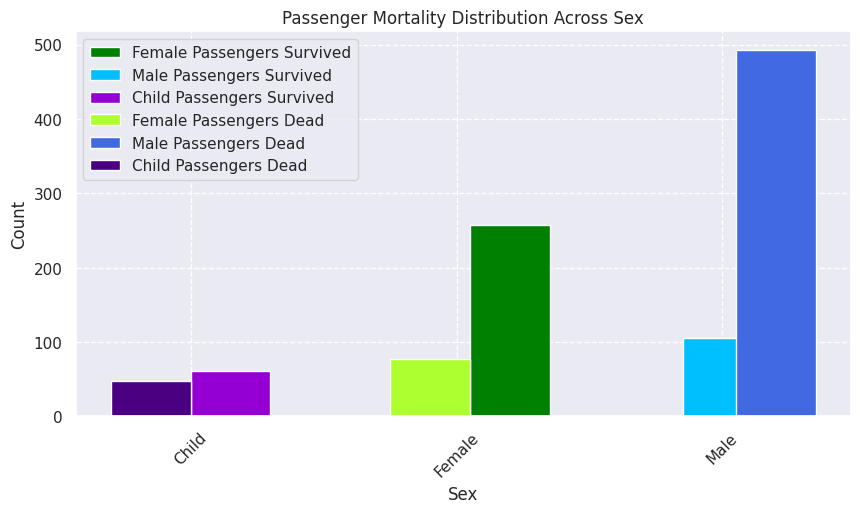

In [56]:
srv_F_counts = srv_F_df['sex'].value_counts().sort_index()
srv_M_counts = srv_M_df['sex'].value_counts().sort_index()
srv_C_counts = srv_child_df['sex'].value_counts().sort_index()


dd_F_counts = dd_F_df['sex'].value_counts().sort_index()
dd_M_counts = dd_M_df['sex'].value_counts().sort_index()
dd_C_counts = dd_child_df['sex'].value_counts().sort_index()

labels = sorted(set(srv_F_counts.index) | set(srv_M_counts.index) | set(srv_C_counts.index))
x = np.arange(len(labels))  # X locations for the groups
width = 0.3  # Bar width for grouping

plt.figure(figsize=(10, 5))

plt.bar(x - width + 0.5, srv_F_counts.reindex(labels, fill_value = 0).values, width = width, color = 'green', label = 'Female Passengers Survived')
plt.bar(x, srv_M_counts.reindex(labels, fill_value = 0).values, width = width, color = 'deepskyblue', label = 'Male Passengers Survived')
plt.bar(x + width - 0.15, srv_C_counts.reindex(labels, fill_value = 0).values, width = width, color = 'darkviolet', label = 'Child Passengers Survived')

plt.bar(x - width + 0.2, dd_F_counts.reindex(labels, fill_value = 0).values, width = width, color = 'greenyellow', label = 'Female Passengers Dead')
plt.bar(x + 0.2, dd_M_counts.reindex(labels, fill_value = 0).values, width = width, color = 'royalblue', label = 'Male Passengers Dead')
plt.bar(x + width - 0.45, dd_C_counts.reindex(labels, fill_value = 0).values, width = width, color = 'indigo', label = 'Child Passengers Dead')


plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Passenger Mortality Distribution Across Sex')
plt.xticks(x, labels, rotation=45)
plt.legend()
plt.grid(True, linestyle='--', alpha = 0.97)

plt.show()
# plt.savefig("PassengerMortalityDistributionAcrossSexHistogram.png")

In [57]:
srv_df.describe()


,pclass,survived,age,sibsp,parch,fare
count,425.000000,425.0,425.000000,425.000000,425.000000,425.000000
mean,1.887059,1.0,28.819020,0.491765,0.538824,53.258883
std,0.847553,0.0,15.004424,0.704134,0.809160,72.721446
min,1.000000,1.0,0.166700,0.000000,0.000000,0.000000
25%,1.000000,1.0,20.000000,0.000000,0.000000,13.000000
50%,2.000000,1.0,28.000000,0.000000,0.000000,26.250000
75%,3.000000,1.0,38.000000,1.000000,1.000000,63.358300
max,3.000000,1.0,80.000000,4.000000,5.000000,512.329200


In [58]:
print('QUESTION 2\n')
print(
    '''
Trump, having recently introduced his Space Force, decides he wants to lay a space monitoring cable around the moon. The Democrats complain that it will damage the surface of the moon and insist that the cable be raised 2m high to avoid destroying the moon’s ecosystem. Trump agrees but says that he will only allow it if the Democrats pay for the additional cable needed for his project thinking this will discourage them. 
If the cable costs an extra $450 per meter, how much will the Democrats have to pay to raise the cable?
    '''
)


QUESTION 2


Trump, having recently introduced his Space Force, decides he wants to lay a space monitoring cable around the moon. The Democrats complain that it will damage the surface of the moon and insist that the cable be raised 2m high to avoid destroying the moon’s ecosystem. Trump agrees but says that he will only allow it if the Democrats pay for the additional cable needed for his project thinking this will discourage them. 
If the cable costs an extra $450 per meter, how much will the Democrats have to pay to raise the cable?
    


In [59]:
print('Assumptions:\n')
#print('\N{GREEK SMALL LETTER PI}r\N{SUPERSCRIPT TWO}')
print(f'* The moon has a radius approximate to 1740 km')
print('''* The cable is to be layed around the circumference of the moon. 
  The demand is to raise it by 2m''')
print('* The cable will cost an extra $450 per meter')

Assumptions:

* The moon has a radius approximate to 1740 km
* The cable is to be layed around the circumference of the moon. 
  The demand is to raise it by 2m
* The cable will cost an extra $450 per meter


In [60]:
print('Circumference = 2\N{GREEK SMALL LETTER PI}r\N{SUPERSCRIPT TWO}\n')
print('Therefore:')
circ_org = round(2 * np.pi * (1740 * 1000), 2)
circ_new = round(2 * np.pi * (1740 * 1000 + 2), 2)
extra_cable = round(circ_new - circ_org, 2)
extra_cost = round(450 * extra_cable, 2)
print(f'''Original Circumference (circ_org) = 2 * \u03C0 * (1740 * 1000) meters 
                                  = {circ_org} meters\n''')
print(f'''New Circumference (circ_new) = 2 * \u03C0 * (1740 * 1000 + 2) meters 
                                  = {circ_new} meters.\n''')
print(f'''The extra circumference required to ensure the cable is layed where the Democrats 
desire is {extra_cable} meters. The extra cost that will be incurred is ${extra_cost}.''')
# Define symbols
#co, cn, eca, ect, pi = symbols('Circ_org Circ_new extra_cable extra_cost \u03C0')

#equation_1 = Eq(circ_org, 2 * pi * (1740 * 1000))
#equation_2 = circ_new = 2 * np.pi * (1740 * 1000 + 2)
#extra_cable = circ_new - circ_org
#extra_cost = 450 * extra_cable
#display(Math(latex(equation_1)))

Circumference = 2πr²

Therefore:
Original Circumference (circ_org) = 2 * π * (1740 * 1000) meters 
                                  = 10932742.43 meters

New Circumference (circ_new) = 2 * π * (1740 * 1000 + 2) meters 
                                  = 10932755.0 meters.

The extra circumference required to ensure the cable is layed where the Democrats 
desire is 12.57 meters. The extra cost that will be incurred is $5656.5.
